### we crop down the images to reduce the features, hence increasing the performance
#### features reduced from 783 to 399

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
# Load train and test data
train_df = pd.read_csv("Processed_CSV/preprocessed_train.csv")
test_df = pd.read_csv("Processed_CSV/preprocessed_test.csv")

# Separate labels and images
train_labels = train_df.iloc[:, 0]
train_images = train_df.iloc[:, 1:].values.reshape(-1, 28, 28)  # Reshape to (60000, 28, 28)
test_labels = test_df.iloc[:, 0]
test_images = test_df.iloc[:, 1:].values.reshape(-1, 28, 28)

In [ ]:
# this function crops and centers the image to 20x20 resolution 
def crop_and_center(image):
    """Crops out empty space around the digit and centers it in a fixed square."""
    # Find nonzero pixel locations
    coords = cv2.findNonZero((image > 0).astype(np.uint8))

    if coords is None:
        return np.zeros((20, 20))  # If the image is fully black, return a blank 20x20

    # Get bounding box around digit
    x, y, w, h = cv2.boundingRect(coords)

    # Crop the image
    cropped = image[y:y+h, x:x+w]

    # Resize to fixed 20x20 while keeping aspect ratio
    target_size = 20
    h, w = cropped.shape
    scale = target_size / max(h, w)
    new_h, new_w = int(h * scale), int(w * scale)
    resized = cv2.resize(cropped, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Center in a fixed 20x20 canvas
    final_image = np.zeros((target_size, target_size))
    x_offset = (target_size - new_w) // 2
    y_offset = (target_size - new_h) // 2
    final_image[y_offset:y_offset+new_h, x_offset:x_offset+new_w] = resized

    return final_image

In [16]:
# Apply cropping and centering to all images
train_images_centered = [crop_and_center(img) for img in train_images]
test_images_centered = [crop_and_center(img) for img in test_images]

# Flatten images for CSV storage
train_images_flat = pd.DataFrame([img.flatten() for img in train_images_centered])
test_images_flat = pd.DataFrame([img.flatten() for img in test_images_centered])

# Recombine with labels
centered_train_df = pd.concat([train_labels.reset_index(drop=True), train_images_flat], axis=1)
centered_test_df = pd.concat([test_labels.reset_index(drop=True), test_images_flat], axis=1)

In [17]:
# Save cropped images as CSV
centered_train_df.to_csv("Processed_CSV/cropped_train.csv", index=False)
centered_test_df.to_csv("Processed_CSV/cropped_test.csv", index=False)

print("Cropped and centered images saved successfully!")

Cropped and centered images saved successfully!


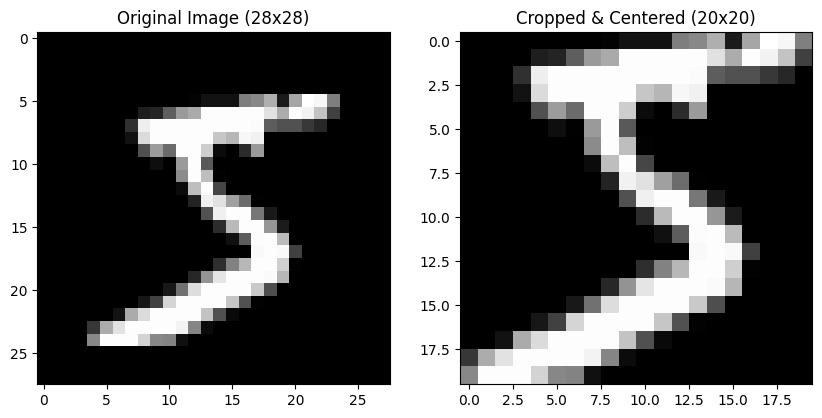

In [ ]:
# Display an example before and after cropping
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(train_images[0], cmap='gray')
axes[0].set_title("Original Image (28x28)")

# Cropped & Centered Image
axes[1].imshow(train_images_centered[0], cmap='gray')
axes[1].set_title("Cropped & Centered (20x20)")

plt.show()